The Nobel Prize has been among the most prestigious international awards since 1901. Each year, awards are bestowed in chemistry, literature, physics, physiology or medicine, economics, and peace. In addition to the honor, prestige, and substantial prize money, the recipient also gets a gold medal with an image of Alfred Nobel (1833 - 1896), who established the prize.

![](Nobel_Prize.png)

The Nobel Foundation has made a dataset available of all prize winners from the outset of the awards from 1901 to 2023. The dataset used in this project is from the Nobel Prize API and is available in the `nobel.csv` file in the `data` folder.

In this project, you'll get a chance to explore and answer several questions related to this prizewinning data. And we encourage you then to explore further questions that you're interested in!

# 🏆 Nobel Prize Winners Data Analysis

In this notebook, we analyze Nobel Prize winner data to identify patterns related to:
1. 👩‍🔬👨‍🔬 Most commonly awarded **gender** and **birth country**  
2. 🇺🇸 Decade with highest **ratio of US-born winners**  
3. 👩 Decade & category with **highest proportion of female laureates**  
4. 👩 First woman Nobel Prize winner and her category  
5. 🔁 Individuals or organizations who have won **multiple Nobel Prizes**  

We will use **Pandas, Seaborn, NumPy, and Matplotlib** for analysis and visualization.


In [1]:
# Import required libraries
import pandas as pd
import seaborn as sns
import numpy as np
import re
import matplotlib.pyplot as plt

# Configure Seaborn style
sns.set_palette("RdBu")
sns.set_context("paper")

# Load dataset
nobel = pd.read_csv("data/nobel.csv")

# Preview dataset
nobel.head()


,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France


## 1. Most Commonly Awarded Gender and Birth Country
We first check the distribution of Nobel laureates by gender and by their **birth country**.


'Male'

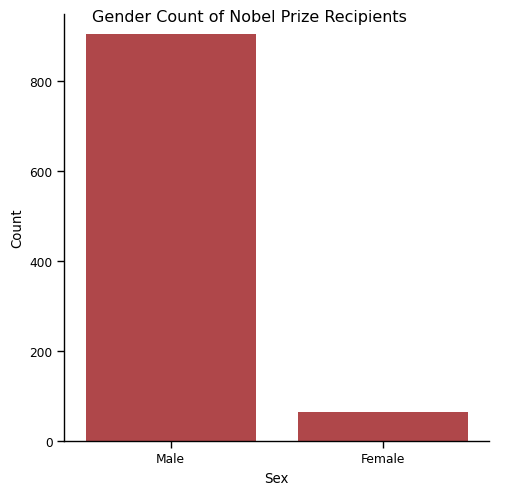

In [2]:
# Gender distribution
g = sns.catplot(x="sex", data=nobel, kind="count")
g.fig.suptitle("Gender Count of Nobel Prize Recipients")
g.set(xlabel="Sex", ylabel="Count")

# Most frequent gender
top_gender = nobel['sex'].value_counts().index[0]
top_gender


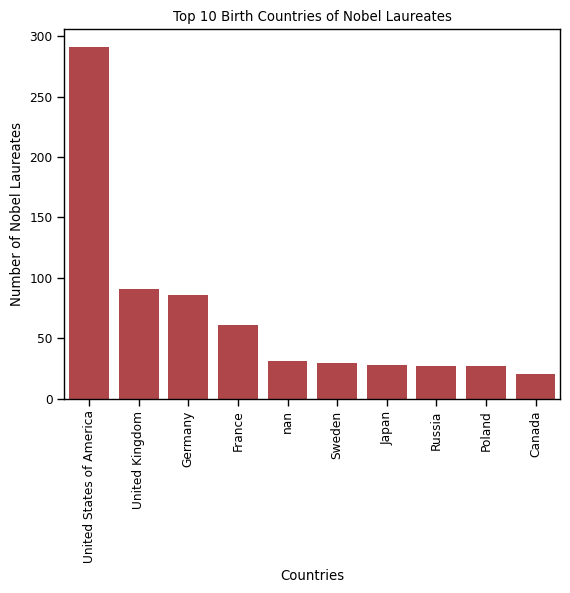

'United States of America'

In [3]:
# Function to clean birth_country column (handle cases like "City (Country)")
def str_match(col):
    text = str(col)
    match = re.search(r"\((.*?)\)", text)
    if match:
        return match.group(1)  # Extract country in parentheses
    else:
        return text

# Apply function to create new column
nobel['birth_COUNTRY'] = nobel['birth_country'].apply(str_match)

# Top 10 birth countries
top_10_country = nobel['birth_COUNTRY'].value_counts().head(10)

# Plot
sns.barplot(x=top_10_country.index, y=top_10_country)
plt.xticks(rotation=90)
plt.xlabel("Countries")
plt.ylabel("Number of Nobel Laureates")
plt.title("Top 10 Birth Countries of Nobel Laureates")
plt.show()

# Most frequent birth country
top_country = top_10_country.index[0]
top_country


## 2. Decade with Highest Ratio of US-born Winners
We calculate the proportion of US-born Nobel laureates in each decade.  

- First, create a `us_born_winner` column (True if born in USA).  
- Then, compute ratio of US-born winners per decade.  
- Identify the decade with the **highest ratio**.


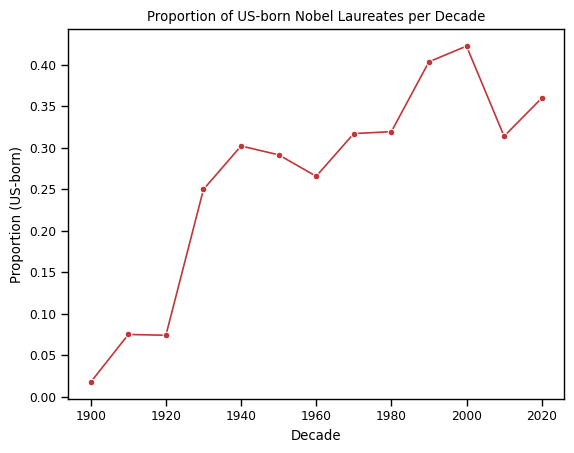

2000

In [4]:
# Create flag for US-born laureates
nobel['us_born_winner'] = nobel['birth_country'] == 'United States of America'

# Create decade column
nobel['decade'] = (np.floor(nobel['year'] / 10) * 10).astype(int)

# Calculate ratio of US-born winners per decade
decade_us_ratio = nobel.groupby('decade', as_index=False)['us_born_winner'].mean()

# Identify decade with max ratio
max_decade_usa = decade_us_ratio.loc[
    decade_us_ratio['us_born_winner'].idxmax(), 'decade'
]

# Plot trend
sns.lineplot(x="decade", y="us_born_winner", data=decade_us_ratio, marker="o")
plt.title("Proportion of US-born Nobel Laureates per Decade")
plt.ylabel("Proportion (US-born)")
plt.xlabel("Decade")
plt.show()

max_decade_usa


## 3. Decade & Category with Highest Proportion of Female Laureates
We calculate the share of female winners per **decade and category**, then find the **maximum** combination.


In [5]:
# Create female winner flag
nobel['female_winner'] = nobel['sex'] == 'Female'

# Group by decade & category
female_winner = nobel.groupby(['decade', 'category'], as_index=False)['female_winner'].mean()

# Find max proportion
max_female = female_winner.loc[female_winner['female_winner'].idxmax()]

# Save as dictionary
max_female_dict = {int(max_female['decade']): max_female['category']}
max_female_dict


{2020: 'Literature'}

## 4. First Woman Nobel Laureate
We filter female laureates, find the earliest year, and return her **name** and **category**.


In [6]:
# Filter female laureates
female_laureates = nobel[nobel['female_winner']]

# Find first female laureate
first_woman = female_laureates.loc[female_laureates['year'].idxmin(), ['full_name', 'category']]

first_woman_name = first_woman['full_name']
first_woman_category = first_woman['category']

first_woman_name, first_woman_category


('Marie Curie, née Sklodowska', 'Physics')

## 5. Repeat Nobel Laureates
We identify individuals or organizations that won more than **one Nobel Prize**.


In [7]:
# Count laureates by name
val_count = nobel['full_name'].value_counts()

# Laureates with 2+ awards
repeat_list = val_count[val_count >= 2].index.tolist()
repeat_list


['Comité international de la Croix Rouge (International Committee of the Red Cross)',
 'Linus Carl Pauling',
 'John Bardeen',
 'Frederick Sanger',
 'Marie Curie, née Sklodowska',
 'Office of the United Nations High Commissioner for Refugees (UNHCR)']

# ✅ Summary of Results

1. **Most awarded gender**: `top_gender`  
2. **Most awarded birth country**: `top_country`  
3. **Decade with highest ratio of US-born winners**: `max_decade_usa`  
4. **Decade & category with highest proportion of female laureates**: `max_female_dict`  
5. **First woman Nobel laureate**: `first_woman_name` in *`first_woman_category`*  
6. **Repeat laureates**: `repeat_list`  

---
